In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df1 = pd.read_csv(r"C:\Users\vadhe\Downloads\Bengaluru_House_Data.csv")

print(df1.shape)
df1.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [3]:
df2 = df1.drop(['availability'], axis='columns')
df2

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df2.isnull().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [5]:
df3 = df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
society       0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [6]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [7]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-7-402cbe9b91bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [8]:
df3

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00,3
13314,Super built-up Area,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00,3
13315,Built-up Area,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2


In [9]:
df3['BHK'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [10]:
df3.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
549,Super built-up Area,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,2 BHK,Rarthne,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,Toainnt,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,2 BHK,Brens7,1160 - 1195,2.0,0.0,59.935,2
850,Super built-up Area,Bannerghatta Road,2 BHK,PrarePa,1115 - 1130,2.0,0.0,58.935,2


In [27]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [29]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


In [30]:
len(df5.location.unique())

634

In [31]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Giri Nagar                       1
1st Block Jayanagar                1
1st Block Koramangala              2
1st Phase JP Nagar                14
2nd Block Hrbr Layout              1
                                  ..
Yelahanka New Town                22
Yelenahalli                        3
Yemlur                             3
Yeshwanthpur                      63
Yeshwanthpur Industrial Suburb     1
Name: location, Length: 626, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

483

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Giri Nagar                      1
1st Block Jayanagar               1
1st Block Koramangala             2
2nd Block Hrbr Layout             1
2nd Block Jayanagar               1
                                 ..
Wilson Garden                     3
Yelachenahalli                    8
Yelenahalli                       3
Yemlur                            3
Yeshwanthpur Industrial Suburb    1
Name: location, Length: 483, dtype: int64

In [34]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

144

In [35]:
df5.head(10)

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,7th Phase JP Nagar,2 BHK,Shncyes,1000.0,2.0,1.0,38.00,2,3800.000000
14,Plot Area,Sarjapur,3 Bedroom,Skityer,2250.0,3.0,2.0,148.00,3,6577.777778
15,Super built-up Area,Mysore Road,2 BHK,PrntaEn,1175.0,2.0,2.0,73.50,2,6255.319149
16,Super built-up Area,Bisuvanahalli,3 BHK,Prityel,1180.0,3.0,2.0,48.00,3,4067.796610
17,Super built-up Area,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1540.0,3.0,3.0,60.00,3,3896.103896


In [36]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape

(7454, 10)

In [37]:
df6.price_per_sqft.describe()

count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_per_sqft, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(5862, 10)

In [40]:
df7.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

In [41]:
df7[df7.bath>5]

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
488,Super built-up Area,Begur Road,4 BHK,Pruthg,2464.50,6.0,0.0,118.0,4,4787.989450
500,Super built-up Area,Begur Road,4 BHK,Pruthg,2500.00,6.0,0.0,122.5,4,4900.000000
608,Super built-up Area,Binny Pete,4 BHK,She 2rk,2940.00,6.0,2.0,280.0,4,9523.809524
1334,Super built-up Area,Frazer Town,4 BHK,Meentan,4850.00,6.0,2.0,385.0,4,7938.144330
1661,Super built-up Area,Hebbal,4 BHK,Brium C,4225.00,6.0,0.0,359.0,4,8497.041420
1666,Super built-up Area,Hebbal,4 BHK,Brium C,4000.00,6.0,1.0,370.0,4,9250.000000
2055,Super built-up Area,Iblur Village,5 BHK,Emine P,5515.00,6.0,2.0,425.0,5,7706.255666
2104,Super built-up Area,Jakkur,4 BHK,SoineC,3467.86,6.0,3.0,249.0,4,7180.220655
2411,Built-up Area,Kanakpura Road,4 Bedroom,ColeyNa,3500.00,6.0,2.0,225.0,4,6428.571429
2972,Super built-up Area,Old Madras Road,4 BHK,Brica E,3715.00,6.0,0.0,224.5,4,6043.068641


Text(0, 0.5, 'count')

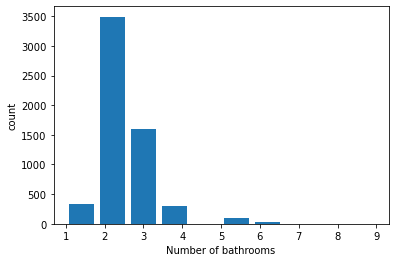

In [42]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [45]:
dummies = pd.get_dummies(df7.location)
dummies.head(3)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df8 = pd.concat([df7,dummies.drop('other', axis='columns')], axis='columns')
df8.head(3)

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df9 = df8.drop('location', axis='columns')
df10 = df9.drop(['area_type', 'society', 'size'], axis='columns')
df10.head(2)

,total_sqft,bath,balcony,price,BHK,price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,250.0,4,8849.557522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,167.0,3,8906.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df10.shape

(5862, 149)

In [62]:
X = df10.drop('price', axis='columns')
X.head()

,total_sqft,bath,balcony,BHK,price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,4,8849.557522,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,3,8906.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,1.0,2,7173.601148,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,2.0,2,8635.097493,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,3.0,3,8238.993711,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Y = df10.price
Y.head()

0    250.0
1    167.0
2    100.0
3     93.0
4    131.0
Name: price, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [65]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.9628617105218646

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.96922788, 0.97284986, 0.96748052, 0.96846979, 0.97010032])

In [70]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [71]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))